Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9896
Epoch [4/100], Loss: 0.9887
Epoch [6/100], Loss: 0.9761
Epoch [8/100], Loss: 0.9722
Epoch [10/100], Loss: 0.9708
Epoch [12/100], Loss: 0.9681
Epoch [14/100], Loss: 0.9631
Epoch [16/100], Loss: 0.9560
Epoch [18/100], Loss: 0.9516
Epoch [20/100], Loss: 0.9466
Epoch [22/100], Loss: 0.9381
Epoch [24/100], Loss: 0.9337
Epoch [26/100], Loss: 0.9282
Epoch [28/100], Loss: 0.9252
Epoch [30/100], Loss: 0.9204
Epoch [32/100], Loss: 0.9178
Epoch [34/100], Loss: 0.9107
Epoch [36/100], Loss: 0.9056
Epoch [38/100], Loss: 0.9010
Epoch [40/100], Loss: 0.8981
Epoch [42/100], Loss: 0.9016
Epoch [44/100], Loss: 0.8984
Epoch [46/100], Loss: 0.8970
Epoch [48/100], Loss: 0.8929
Epoch [50/100], Loss: 0.8893
Epoch [52/100], Loss: 0.8869
Epoch [54/100], Loss: 0.8854
Epoch [56/100], Loss: 0.8837
Epoch [58/100], Loss: 0.8820
Epoch [60/100], Loss: 0.8800
Epoch [62/100], Loss: 0.8783
Epoch [64/100], Loss: 0.8772
Epoch [66/100], Loss: 0.8758
Epoch [68/100], Loss: 0.8746
Epoch [70/100], Lo

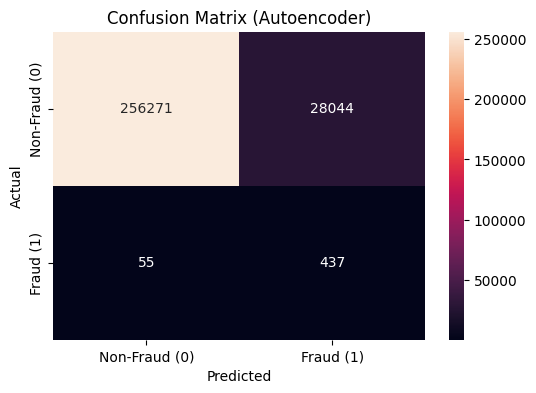

Card Precision@100: 0.3000


In [ ]:
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

In [3]:
print(input_dim)

30


Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9920
Epoch [4/100], Loss: 0.9823
Epoch [6/100], Loss: 0.9491
Epoch [8/100], Loss: 0.9206
Epoch [10/100], Loss: 0.9143
Epoch [12/100], Loss: 0.8934
Epoch [14/100], Loss: 0.8867
Epoch [16/100], Loss: 0.8702
Epoch [18/100], Loss: 0.8693
Epoch [20/100], Loss: 0.8653
Epoch [22/100], Loss: 0.8586
Epoch [24/100], Loss: 0.8577
Epoch [26/100], Loss: 0.8509
Epoch [28/100], Loss: 0.8499
Epoch [30/100], Loss: 0.8466
Epoch [32/100], Loss: 0.8418
Epoch [34/100], Loss: 0.8381
Epoch [36/100], Loss: 0.8329
Epoch [38/100], Loss: 0.8282
Epoch [40/100], Loss: 0.8194
Epoch [42/100], Loss: 0.8063
Epoch [44/100], Loss: 0.8049
Epoch [46/100], Loss: 0.7923
Epoch [48/100], Loss: 0.7947
Epoch [50/100], Loss: 0.7893
Epoch [52/100], Loss: 0.7862
Epoch [54/100], Loss: 0.7792
Epoch [56/100], Loss: 0.7775
Epoch [58/100], Loss: 0.7741
Epoch [60/100], Loss: 0.7726
Epoch [62/100], Loss: 0.7683
Epoch [64/100], Loss: 0.7662
Epoch [66/100], Loss: 0.7629
Epoch [68/100], Loss: 0.7631
Epoch [70/100], Lo

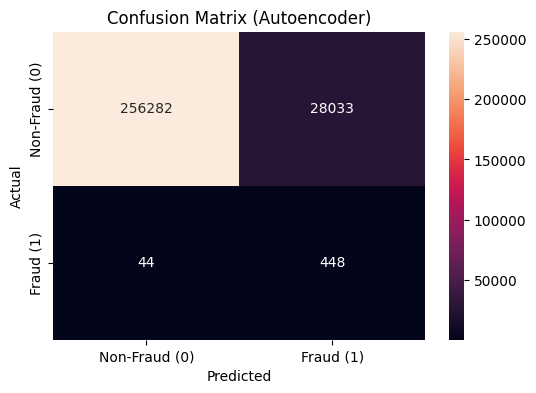

Card Precision@100: 0.3000


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(2.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)) / self.sigma)) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

In [31]:
for name, module in autoencoder.named_modules():
    if isinstance(module, GEU):
        print(f"GEU sigma: {module.sigma.item()}")
    elif isinstance(module, GELU):
        print(f"GELU sigma: {module.sigma.item()}")

GEU sigma: 1.333621859550476
GEU sigma: 1.2725517749786377
GEU sigma: 1.2050220966339111
GEU sigma: 1.0556044578552246
GELU sigma: 2.228588342666626
GEU sigma: 0.9395394921302795
GEU sigma: 0.9633104801177979
GEU sigma: 0.978215754032135
GEU sigma: 0.9657608866691589
GELU sigma: 2.8587899208068848


Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9910
Epoch [4/100], Loss: 0.9834
Epoch [6/100], Loss: 0.9556
Epoch [8/100], Loss: 0.9360
Epoch [10/100], Loss: 0.9210
Epoch [12/100], Loss: 0.9157
Epoch [14/100], Loss: 0.9024
Epoch [16/100], Loss: 0.8921
Epoch [18/100], Loss: 0.8867
Epoch [20/100], Loss: 0.8815
Epoch [22/100], Loss: 0.8756
Epoch [24/100], Loss: 0.8703
Epoch [26/100], Loss: 0.8655
Epoch [28/100], Loss: 0.8604
Epoch [30/100], Loss: 0.8544
Epoch [32/100], Loss: 0.8526
Epoch [34/100], Loss: 0.8423
Epoch [36/100], Loss: 0.8404
Epoch [38/100], Loss: 0.8335
Epoch [40/100], Loss: 0.8289
Epoch [42/100], Loss: 0.8240
Epoch [44/100], Loss: 0.8195
Epoch [46/100], Loss: 0.8186
Epoch [48/100], Loss: 0.8126
Epoch [50/100], Loss: 0.8115
Epoch [52/100], Loss: 0.8055
Epoch [54/100], Loss: 0.8012
Epoch [56/100], Loss: 0.7988
Epoch [58/100], Loss: 0.8029
Epoch [60/100], Loss: 0.8015
Epoch [62/100], Loss: 0.8000
Epoch [64/100], Loss: 0.7935
Epoch [66/100], Loss: 0.7920
Epoch [68/100], Loss: 0.7918
Epoch [70/100], Lo

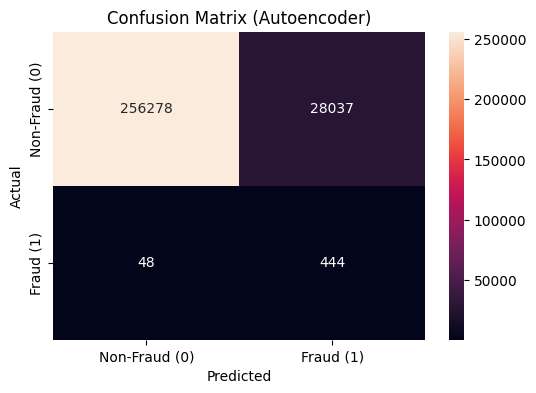

Card Precision@100: 0.3500


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(0.8))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)))) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

In [19]:
for name, module in autoencoder.named_modules():
    if isinstance(module, GEU):
        print(f"GEU sigma: {module.sigma.item()}")
    elif isinstance(module, GELU):
        print(f"GELU sigma: {module.sigma.item()}")

GEU sigma: 1.1706148386001587
GEU sigma: 1.1732738018035889
GEU sigma: 1.1332759857177734
GEU sigma: 1.0345481634140015
GELU sigma: 0.800000011920929
GEU sigma: 0.9376725554466248
GEU sigma: 0.9801077842712402
GEU sigma: 1.0043418407440186
GEU sigma: 1.0071449279785156
GELU sigma: 0.800000011920929


Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9895
Epoch [4/100], Loss: 0.9655
Epoch [6/100], Loss: 0.9352
Epoch [8/100], Loss: 0.9278
Epoch [10/100], Loss: 0.9137
Epoch [12/100], Loss: 0.9118
Epoch [14/100], Loss: 0.9022
Epoch [16/100], Loss: 0.9016
Epoch [18/100], Loss: 0.8969
Epoch [20/100], Loss: 0.8931
Epoch [22/100], Loss: 0.8893
Epoch [24/100], Loss: 0.8843
Epoch [26/100], Loss: 0.8803
Epoch [28/100], Loss: 0.8736
Epoch [30/100], Loss: 0.8650
Epoch [32/100], Loss: 0.8578
Epoch [34/100], Loss: 0.8517
Epoch [36/100], Loss: 0.8460
Epoch [38/100], Loss: 0.8402
Epoch [40/100], Loss: 0.8357
Epoch [42/100], Loss: 0.8340
Epoch [44/100], Loss: 0.8242
Epoch [46/100], Loss: 0.8170
Epoch [48/100], Loss: 0.8126
Epoch [50/100], Loss: 0.8063
Epoch [52/100], Loss: 0.8012
Epoch [54/100], Loss: 0.7940
Epoch [56/100], Loss: 0.7896
Epoch [58/100], Loss: 0.7833
Epoch [60/100], Loss: 0.7809
Epoch [62/100], Loss: 0.7761
Epoch [64/100], Loss: 0.7708
Epoch [66/100], Loss: 0.7665
Epoch [68/100], Loss: 0.7623
Epoch [70/100], Lo

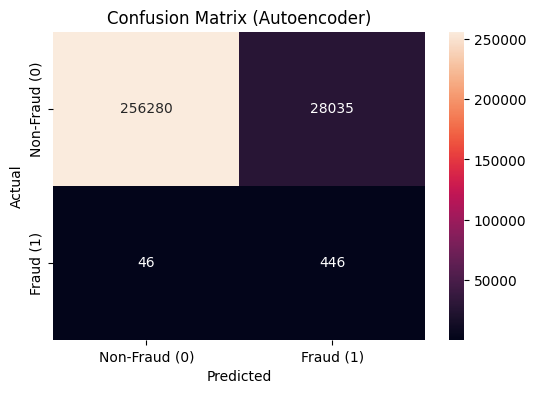

Card Precision@100: 0.3000


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)) / self.sigma)) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9900
Epoch [4/100], Loss: 0.9755
Epoch [6/100], Loss: 0.9481
Epoch [8/100], Loss: 0.9197
Epoch [10/100], Loss: 0.9072
Epoch [12/100], Loss: 0.8924
Epoch [14/100], Loss: 0.8875
Epoch [16/100], Loss: 0.8732
Epoch [18/100], Loss: 0.8715
Epoch [20/100], Loss: 0.8638
Epoch [22/100], Loss: 0.8599
Epoch [24/100], Loss: 0.8538
Epoch [26/100], Loss: 0.8490
Epoch [28/100], Loss: 0.8427
Epoch [30/100], Loss: 0.8365
Epoch [32/100], Loss: 0.8308
Epoch [34/100], Loss: 0.8228
Epoch [36/100], Loss: 0.8183
Epoch [38/100], Loss: 0.8109
Epoch [40/100], Loss: 0.8067
Epoch [42/100], Loss: 0.8077
Epoch [44/100], Loss: 0.7995
Epoch [46/100], Loss: 0.7948
Epoch [48/100], Loss: 0.7880
Epoch [50/100], Loss: 0.7831
Epoch [52/100], Loss: 0.7789
Epoch [54/100], Loss: 0.7733
Epoch [56/100], Loss: 0.7676
Epoch [58/100], Loss: 0.7639
Epoch [60/100], Loss: 0.7595
Epoch [62/100], Loss: 0.7537
Epoch [64/100], Loss: 0.7479
Epoch [66/100], Loss: 0.7437
Epoch [68/100], Loss: 0.7391
Epoch [70/100], Lo

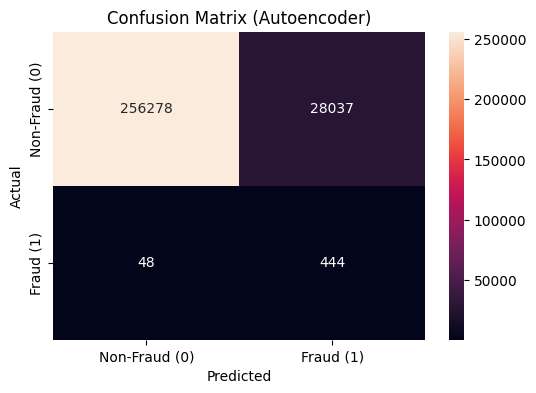

Card Precision@100: 0.3200


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(0.8))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)))) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9910
Epoch [4/100], Loss: 0.9734
Epoch [6/100], Loss: 0.9267
Epoch [8/100], Loss: 0.9157
Epoch [10/100], Loss: 0.9112
Epoch [12/100], Loss: 0.9002
Epoch [14/100], Loss: 0.8854
Epoch [16/100], Loss: 0.8794
Epoch [18/100], Loss: 0.8713
Epoch [20/100], Loss: 0.8685
Epoch [22/100], Loss: 0.8638
Epoch [24/100], Loss: 0.8571
Epoch [26/100], Loss: 0.8536
Epoch [28/100], Loss: 0.8487
Epoch [30/100], Loss: 0.8447
Epoch [32/100], Loss: 0.8414
Epoch [34/100], Loss: 0.8366
Epoch [36/100], Loss: 0.8347
Epoch [38/100], Loss: 0.8328
Epoch [40/100], Loss: 0.8284
Epoch [42/100], Loss: 0.8228
Epoch [44/100], Loss: 0.8168
Epoch [46/100], Loss: 0.8127
Epoch [48/100], Loss: 0.8086
Epoch [50/100], Loss: 0.8048
Epoch [52/100], Loss: 0.8097
Epoch [54/100], Loss: 0.8047
Epoch [56/100], Loss: 0.8021
Epoch [58/100], Loss: 0.7988
Epoch [60/100], Loss: 0.7939
Epoch [62/100], Loss: 0.7892
Epoch [64/100], Loss: 0.7857
Epoch [66/100], Loss: 0.7850
Epoch [68/100], Loss: 0.7821
Epoch [70/100], Lo

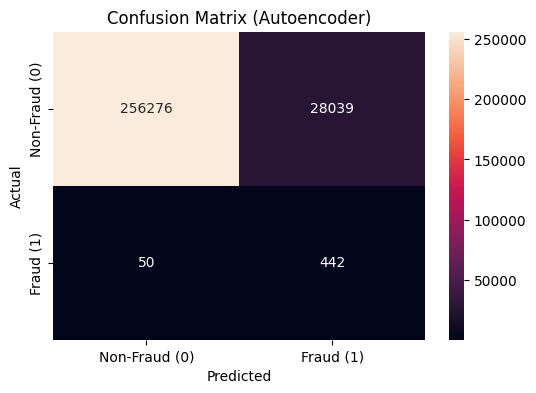

Card Precision@100: 0.2900


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(0.8))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)))) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9911
Epoch [4/100], Loss: 0.9754
Epoch [6/100], Loss: 0.9685
Epoch [8/100], Loss: 0.9519
Epoch [10/100], Loss: 0.9483
Epoch [12/100], Loss: 0.9344
Epoch [14/100], Loss: 0.9206
Epoch [16/100], Loss: 0.9070
Epoch [18/100], Loss: 0.8910
Epoch [20/100], Loss: 0.8836
Epoch [22/100], Loss: 0.8746
Epoch [24/100], Loss: 0.8652
Epoch [26/100], Loss: 0.8600
Epoch [28/100], Loss: 0.8488
Epoch [30/100], Loss: 0.8433
Epoch [32/100], Loss: 0.8340
Epoch [34/100], Loss: 0.8298
Epoch [36/100], Loss: 0.8248
Epoch [38/100], Loss: 0.8188
Epoch [40/100], Loss: 0.8138
Epoch [42/100], Loss: 0.8137
Epoch [44/100], Loss: 0.8069
Epoch [46/100], Loss: 0.8019
Epoch [48/100], Loss: 0.7986
Epoch [50/100], Loss: 0.7975
Epoch [52/100], Loss: 0.7966
Epoch [54/100], Loss: 0.7931
Epoch [56/100], Loss: 0.7891
Epoch [58/100], Loss: 0.7863
Epoch [60/100], Loss: 0.7829
Epoch [62/100], Loss: 0.7791
Epoch [64/100], Loss: 0.7780
Epoch [66/100], Loss: 0.7694
Epoch [68/100], Loss: 0.7672
Epoch [70/100], Lo

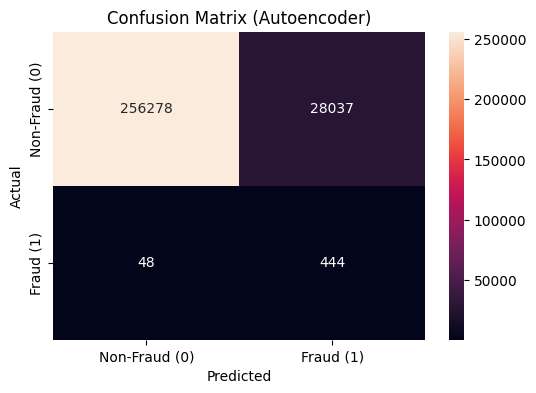

Card Precision@100: 0.2800


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(0.8))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)))) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9906
Epoch [4/100], Loss: 0.9804
Epoch [6/100], Loss: 0.9418
Epoch [8/100], Loss: 0.9182
Epoch [10/100], Loss: 0.9185
Epoch [12/100], Loss: 0.8992
Epoch [14/100], Loss: 0.8961
Epoch [16/100], Loss: 0.8854
Epoch [18/100], Loss: 0.8802
Epoch [20/100], Loss: 0.8743
Epoch [22/100], Loss: 0.8674
Epoch [24/100], Loss: 0.8597
Epoch [26/100], Loss: 0.8500
Epoch [28/100], Loss: 0.8424
Epoch [30/100], Loss: 0.8374
Epoch [32/100], Loss: 0.8306
Epoch [34/100], Loss: 0.8280
Epoch [36/100], Loss: 0.8230
Epoch [38/100], Loss: 0.8205
Epoch [40/100], Loss: 0.8182
Epoch [42/100], Loss: 0.8151
Epoch [44/100], Loss: 0.8123
Epoch [46/100], Loss: 0.8084
Epoch [48/100], Loss: 0.8032
Epoch [50/100], Loss: 0.8003
Epoch [52/100], Loss: 0.7967
Epoch [54/100], Loss: 0.7945
Epoch [56/100], Loss: 0.7914
Epoch [58/100], Loss: 0.7903
Epoch [60/100], Loss: 0.7899
Epoch [62/100], Loss: 0.7876
Epoch [64/100], Loss: 0.7923
Epoch [66/100], Loss: 0.7878
Epoch [68/100], Loss: 0.7837
Epoch [70/100], Lo

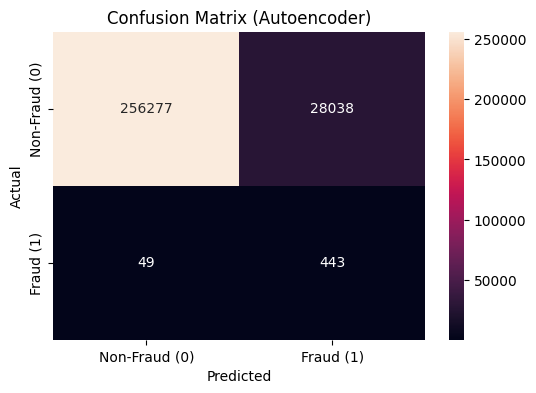

Card Precision@100: 0.3000


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(0.8))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)))) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9897
Epoch [4/100], Loss: 0.9756
Epoch [6/100], Loss: 0.9669
Epoch [8/100], Loss: 0.9433
Epoch [10/100], Loss: 0.9285
Epoch [12/100], Loss: 0.9160
Epoch [14/100], Loss: 0.9078
Epoch [16/100], Loss: 0.9029
Epoch [18/100], Loss: 0.8936
Epoch [20/100], Loss: 0.8794
Epoch [22/100], Loss: 0.8799
Epoch [24/100], Loss: 0.8680
Epoch [26/100], Loss: 0.8688
Epoch [28/100], Loss: 0.8620
Epoch [30/100], Loss: 0.8601
Epoch [32/100], Loss: 0.8553
Epoch [34/100], Loss: 0.8538
Epoch [36/100], Loss: 0.8501
Epoch [38/100], Loss: 0.8492
Epoch [40/100], Loss: 0.8438
Epoch [42/100], Loss: 0.8415
Epoch [44/100], Loss: 0.8392
Epoch [46/100], Loss: 0.8351
Epoch [48/100], Loss: 0.8323
Epoch [50/100], Loss: 0.8301
Epoch [52/100], Loss: 0.8297
Epoch [54/100], Loss: 0.8262
Epoch [56/100], Loss: 0.8277
Epoch [58/100], Loss: 0.8211
Epoch [60/100], Loss: 0.8238
Epoch [62/100], Loss: 0.8191
Epoch [64/100], Loss: 0.8141
Epoch [66/100], Loss: 0.8120
Epoch [68/100], Loss: 0.8104
Epoch [70/100], Lo

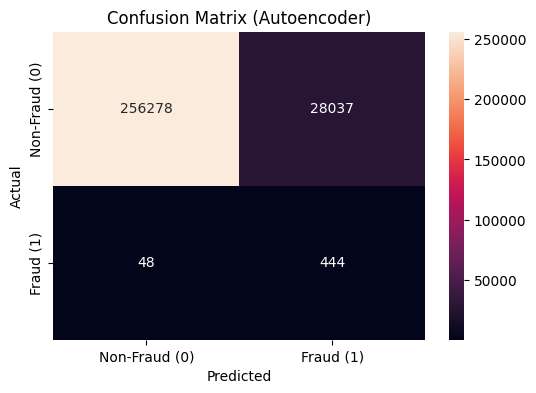

Card Precision@100: 0.2900


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class GELU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(0.8))  # 1个可学习参数 sigma

    def forward(self, input):
        # GELU 激活函数的计算公式
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0)))) / 2
        return temp

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            GELU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            GELU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9908
Epoch [4/100], Loss: 0.9810
Epoch [6/100], Loss: 0.9579
Epoch [8/100], Loss: 0.9452
Epoch [10/100], Loss: 0.9358
Epoch [12/100], Loss: 0.9179
Epoch [14/100], Loss: 0.9143
Epoch [16/100], Loss: 0.9068
Epoch [18/100], Loss: 0.9019
Epoch [20/100], Loss: 0.8911
Epoch [22/100], Loss: 0.8887
Epoch [24/100], Loss: 0.8838
Epoch [26/100], Loss: 0.8778
Epoch [28/100], Loss: 0.8723
Epoch [30/100], Loss: 0.8648
Epoch [32/100], Loss: 0.8589
Epoch [34/100], Loss: 0.8522
Epoch [36/100], Loss: 0.8433
Epoch [38/100], Loss: 0.8400
Epoch [40/100], Loss: 0.8342
Epoch [42/100], Loss: 0.8315
Epoch [44/100], Loss: 0.8394
Epoch [46/100], Loss: 0.8323
Epoch [48/100], Loss: 0.8271
Epoch [50/100], Loss: 0.8212
Epoch [52/100], Loss: 0.8165
Epoch [54/100], Loss: 0.8111
Epoch [56/100], Loss: 0.8063
Epoch [58/100], Loss: 0.8011
Epoch [60/100], Loss: 0.7977
Epoch [62/100], Loss: 0.7913
Epoch [64/100], Loss: 0.7861
Epoch [66/100], Loss: 0.7834
Epoch [68/100], Loss: 0.7786
Epoch [70/100], Lo

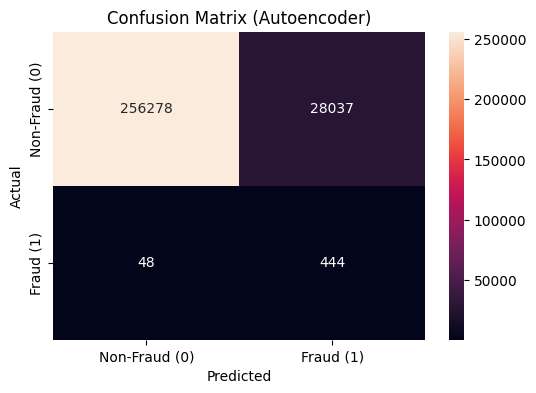

Card Precision@100: 0.3000


In [12]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class SiLU(nn.Module):
    def __init__(self):
        super(SiLU, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(0.5)) 
    
    def forward(self, input):
        output = input * torch.sigmoid(input / self.sigma)
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            SiLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            SiLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9906
Epoch [4/100], Loss: 0.9796
Epoch [6/100], Loss: 0.9379
Epoch [8/100], Loss: 0.9320
Epoch [10/100], Loss: 0.9011
Epoch [12/100], Loss: 0.8978
Epoch [14/100], Loss: 0.8899
Epoch [16/100], Loss: 0.8830
Epoch [18/100], Loss: 0.8776
Epoch [20/100], Loss: 0.8684
Epoch [22/100], Loss: 0.8647
Epoch [24/100], Loss: 0.8577
Epoch [26/100], Loss: 0.8516
Epoch [28/100], Loss: 0.8441
Epoch [30/100], Loss: 0.8379
Epoch [32/100], Loss: 0.8310
Epoch [34/100], Loss: 0.8235
Epoch [36/100], Loss: 0.8160
Epoch [38/100], Loss: 0.8102
Epoch [40/100], Loss: 0.8083
Epoch [42/100], Loss: 0.8017
Epoch [44/100], Loss: 0.7924
Epoch [46/100], Loss: 0.7875
Epoch [48/100], Loss: 0.7844
Epoch [50/100], Loss: 0.7786
Epoch [52/100], Loss: 0.7740
Epoch [54/100], Loss: 0.7721
Epoch [56/100], Loss: 0.7708
Epoch [58/100], Loss: 0.7663
Epoch [60/100], Loss: 0.7645
Epoch [62/100], Loss: 0.7603
Epoch [64/100], Loss: 0.7578
Epoch [66/100], Loss: 0.7533
Epoch [68/100], Loss: 0.7506
Epoch [70/100], Lo

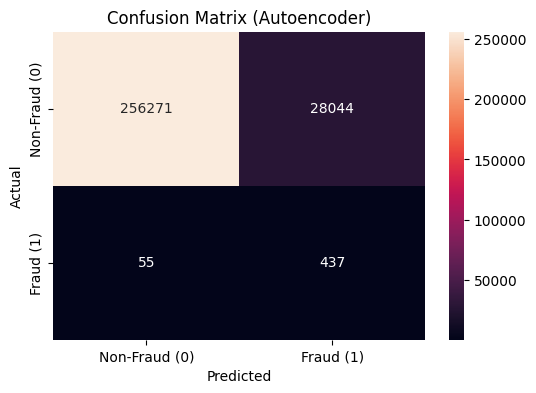

Card Precision@100: 0.3200


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class SiLU(nn.Module):
    def __init__(self):
        super(SiLU, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(0.5)) 
    
    def forward(self, input):
        output = input * torch.sigmoid(input / self.sigma)
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            SiLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            SiLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9897
Epoch [4/100], Loss: 0.9706
Epoch [6/100], Loss: 0.9447
Epoch [8/100], Loss: 0.9250
Epoch [10/100], Loss: 0.9106
Epoch [12/100], Loss: 0.8948
Epoch [14/100], Loss: 0.8824
Epoch [16/100], Loss: 0.8766
Epoch [18/100], Loss: 0.8666
Epoch [20/100], Loss: 0.8589
Epoch [22/100], Loss: 0.8472
Epoch [24/100], Loss: 0.8427
Epoch [26/100], Loss: 0.8327
Epoch [28/100], Loss: 0.8272
Epoch [30/100], Loss: 0.8211
Epoch [32/100], Loss: 0.8140
Epoch [34/100], Loss: 0.8102
Epoch [36/100], Loss: 0.8053
Epoch [38/100], Loss: 0.8029
Epoch [40/100], Loss: 0.7937
Epoch [42/100], Loss: 0.7891
Epoch [44/100], Loss: 0.7853
Epoch [46/100], Loss: 0.7821
Epoch [48/100], Loss: 0.7800
Epoch [50/100], Loss: 0.7829
Epoch [52/100], Loss: 0.7759
Epoch [54/100], Loss: 0.7733
Epoch [56/100], Loss: 0.7707
Epoch [58/100], Loss: 0.7676
Epoch [60/100], Loss: 0.7644
Epoch [62/100], Loss: 0.7611
Epoch [64/100], Loss: 0.7584
Epoch [66/100], Loss: 0.7560
Epoch [68/100], Loss: 0.7609
Epoch [70/100], Lo

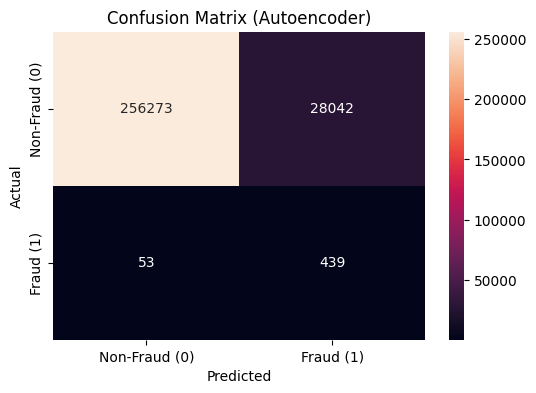

Card Precision@100: 0.3000


In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class SiLU(nn.Module):
    def __init__(self):
        super(SiLU, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(0.5)) 
    
    def forward(self, input):
        output = input * torch.sigmoid(input / self.sigma)
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            SiLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            SiLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9904
Epoch [4/100], Loss: 0.9732
Epoch [6/100], Loss: 0.9362
Epoch [8/100], Loss: 0.9069
Epoch [10/100], Loss: 0.8823
Epoch [12/100], Loss: 0.8774
Epoch [14/100], Loss: 0.8632
Epoch [16/100], Loss: 0.8547
Epoch [18/100], Loss: 0.8476
Epoch [20/100], Loss: 0.8404
Epoch [22/100], Loss: 0.8327
Epoch [24/100], Loss: 0.8274
Epoch [26/100], Loss: 0.8202
Epoch [28/100], Loss: 0.8151
Epoch [30/100], Loss: 0.8095
Epoch [32/100], Loss: 0.8059
Epoch [34/100], Loss: 0.8075
Epoch [36/100], Loss: 0.7995
Epoch [38/100], Loss: 0.7956
Epoch [40/100], Loss: 0.7933
Epoch [42/100], Loss: 0.7874
Epoch [44/100], Loss: 0.7851
Epoch [46/100], Loss: 0.7815
Epoch [48/100], Loss: 0.7775
Epoch [50/100], Loss: 0.7746
Epoch [52/100], Loss: 0.7711
Epoch [54/100], Loss: 0.7674
Epoch [56/100], Loss: 0.7640
Epoch [58/100], Loss: 0.7612
Epoch [60/100], Loss: 0.7589
Epoch [62/100], Loss: 0.7578
Epoch [64/100], Loss: 0.7584
Epoch [66/100], Loss: 0.7512
Epoch [68/100], Loss: 0.7494
Epoch [70/100], Lo

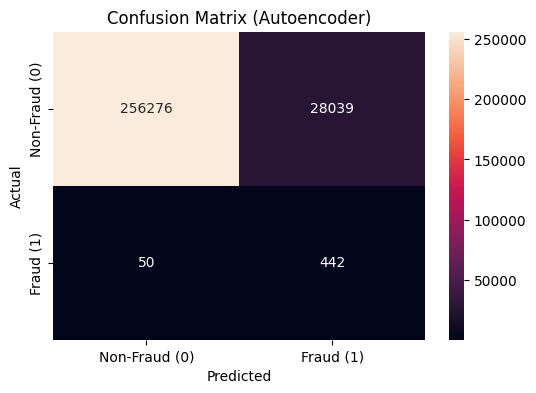

Card Precision@100: 0.3200


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class SiLU(nn.Module):
    def __init__(self):
        super(SiLU, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(0.5)) 
    
    def forward(self, input):
        output = input * torch.sigmoid(input / self.sigma)
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            SiLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            SiLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9906
Epoch [4/100], Loss: 0.9799
Epoch [6/100], Loss: 0.9673
Epoch [8/100], Loss: 0.9449
Epoch [10/100], Loss: 0.9294
Epoch [12/100], Loss: 0.9190
Epoch [14/100], Loss: 0.9117
Epoch [16/100], Loss: 0.9064
Epoch [18/100], Loss: 0.8993
Epoch [20/100], Loss: 0.8917
Epoch [22/100], Loss: 0.8828
Epoch [24/100], Loss: 0.8718
Epoch [26/100], Loss: 0.8640
Epoch [28/100], Loss: 0.8544
Epoch [30/100], Loss: 0.8472
Epoch [32/100], Loss: 0.8397
Epoch [34/100], Loss: 0.8333
Epoch [36/100], Loss: 0.8246
Epoch [38/100], Loss: 0.8309
Epoch [40/100], Loss: 0.8139
Epoch [42/100], Loss: 0.8097
Epoch [44/100], Loss: 0.8056
Epoch [46/100], Loss: 0.7997
Epoch [48/100], Loss: 0.7949
Epoch [50/100], Loss: 0.7865
Epoch [52/100], Loss: 0.7820
Epoch [54/100], Loss: 0.7779
Epoch [56/100], Loss: 0.7741
Epoch [58/100], Loss: 0.7691
Epoch [60/100], Loss: 0.7645
Epoch [62/100], Loss: 0.7610
Epoch [64/100], Loss: 0.7575
Epoch [66/100], Loss: 0.7545
Epoch [68/100], Loss: 0.7519
Epoch [70/100], Lo

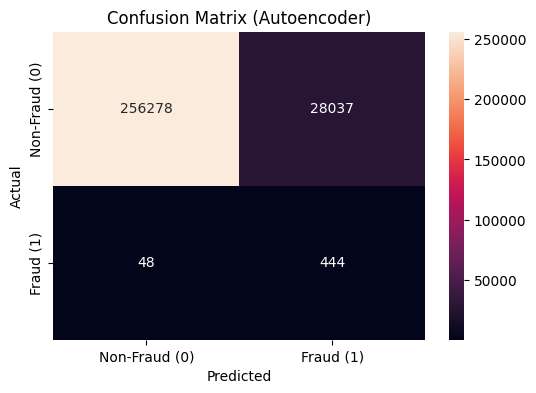

Card Precision@100: 0.2900


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class SiLU(nn.Module):
    def __init__(self):
        super(SiLU, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(0.5)) 
    
    def forward(self, input):
        output = input * torch.sigmoid(input / self.sigma)
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            SiLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            SiLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9898
Epoch [4/100], Loss: 0.9763
Epoch [6/100], Loss: 0.9475
Epoch [8/100], Loss: 0.9241
Epoch [10/100], Loss: 0.9187
Epoch [12/100], Loss: 0.9029
Epoch [14/100], Loss: 0.8893
Epoch [16/100], Loss: 0.8821
Epoch [18/100], Loss: 0.8719
Epoch [20/100], Loss: 0.8659
Epoch [22/100], Loss: 0.8572
Epoch [24/100], Loss: 0.8507
Epoch [26/100], Loss: 0.8441
Epoch [28/100], Loss: 0.8379
Epoch [30/100], Loss: 0.8304
Epoch [32/100], Loss: 0.8229
Epoch [34/100], Loss: 0.8131
Epoch [36/100], Loss: 0.8021
Epoch [38/100], Loss: 0.7942
Epoch [40/100], Loss: 0.7864
Epoch [42/100], Loss: 0.7799
Epoch [44/100], Loss: 0.7739
Epoch [46/100], Loss: 0.7763
Epoch [48/100], Loss: 0.7623
Epoch [50/100], Loss: 0.7557
Epoch [52/100], Loss: 0.7541
Epoch [54/100], Loss: 0.7508
Epoch [56/100], Loss: 0.7434
Epoch [58/100], Loss: 0.7422
Epoch [60/100], Loss: 0.7375
Epoch [62/100], Loss: 0.7449
Epoch [64/100], Loss: 0.7369
Epoch [66/100], Loss: 0.7283
Epoch [68/100], Loss: 0.7299
Epoch [70/100], Lo

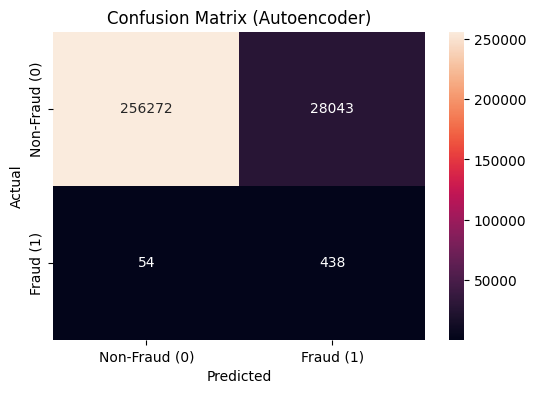

Card Precision@100: 0.3300


In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class SiLU(nn.Module):
    def __init__(self):
        super(SiLU, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(0.5)) 
    
    def forward(self, input):
        output = input * torch.sigmoid(input / self.sigma)
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            SiLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            SiLU()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

In [ ]:
MISH

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9888
Epoch [4/100], Loss: 0.9553
Epoch [6/100], Loss: 0.9458
Epoch [8/100], Loss: 0.9344
Epoch [10/100], Loss: 0.9117
Epoch [12/100], Loss: 0.9085
Epoch [14/100], Loss: 0.8982
Epoch [16/100], Loss: 0.8902
Epoch [18/100], Loss: 0.8719
Epoch [20/100], Loss: 0.8646
Epoch [22/100], Loss: 0.8542
Epoch [24/100], Loss: 0.8501
Epoch [26/100], Loss: 0.8428
Epoch [28/100], Loss: 0.8347
Epoch [30/100], Loss: 0.8281
Epoch [32/100], Loss: 0.8222
Epoch [34/100], Loss: 0.8142
Epoch [36/100], Loss: 0.8054
Epoch [38/100], Loss: 0.7977
Epoch [40/100], Loss: 0.7897
Epoch [42/100], Loss: 0.7830
Epoch [44/100], Loss: 0.7768
Epoch [46/100], Loss: 0.7654
Epoch [48/100], Loss: 0.7585
Epoch [50/100], Loss: 0.7511
Epoch [52/100], Loss: 0.7478
Epoch [54/100], Loss: 0.7415
Epoch [56/100], Loss: 0.7364
Epoch [58/100], Loss: 0.7322
Epoch [60/100], Loss: 0.7293
Epoch [62/100], Loss: 0.7306
Epoch [64/100], Loss: 0.7295
Epoch [66/100], Loss: 0.7318
Epoch [68/100], Loss: 0.7277
Epoch [70/100], Lo

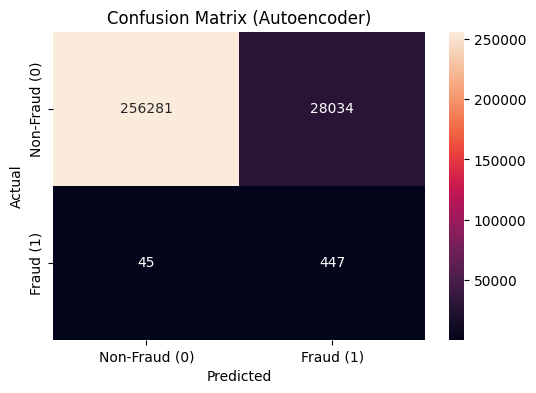

Card Precision@100: 0.3000


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class PMish(nn.Module):
    def __init__(self, init_sigma=0.8):
        super(PMish, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(init_sigma, dtype=torch.float32))
    
    def forward(self, input):
        # Original Mish: x * tanh(softplus(x))
        # Parameterized version: x * tanh(softplus(x / sigma))
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        output = input * tanh_softplus
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            PMish()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            PMish()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9932
Epoch [4/100], Loss: 0.9741
Epoch [6/100], Loss: 0.9609
Epoch [8/100], Loss: 0.9461
Epoch [10/100], Loss: 0.9372
Epoch [12/100], Loss: 0.9196
Epoch [14/100], Loss: 0.8902
Epoch [16/100], Loss: 0.8815
Epoch [18/100], Loss: 0.8655
Epoch [20/100], Loss: 0.8425
Epoch [22/100], Loss: 0.8356
Epoch [24/100], Loss: 0.8267
Epoch [26/100], Loss: 0.8184
Epoch [28/100], Loss: 0.8145
Epoch [30/100], Loss: 0.8062
Epoch [32/100], Loss: 0.8002
Epoch [34/100], Loss: 0.7885
Epoch [36/100], Loss: 0.7800
Epoch [38/100], Loss: 0.7724
Epoch [40/100], Loss: 0.7659
Epoch [42/100], Loss: 0.7600
Epoch [44/100], Loss: 0.7556
Epoch [46/100], Loss: 0.7498
Epoch [48/100], Loss: 0.7456
Epoch [50/100], Loss: 0.7478
Epoch [52/100], Loss: 0.7406
Epoch [54/100], Loss: 0.7359
Epoch [56/100], Loss: 0.7314
Epoch [58/100], Loss: 0.7284
Epoch [60/100], Loss: 0.7263
Epoch [62/100], Loss: 0.7239
Epoch [64/100], Loss: 0.7215
Epoch [66/100], Loss: 0.7208
Epoch [68/100], Loss: 0.7149
Epoch [70/100], Lo

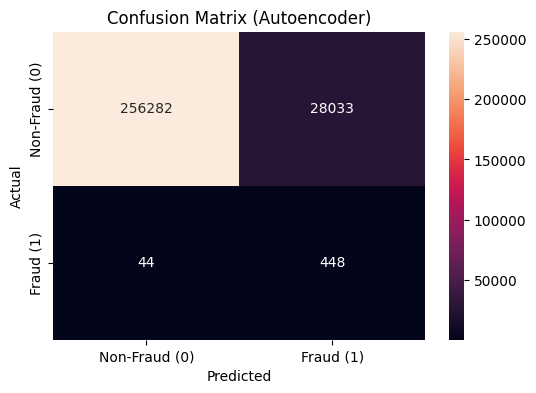

Card Precision@100: 0.3200


In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class PMish(nn.Module):
    def __init__(self, init_sigma=0.8):
        super(PMish, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(init_sigma, dtype=torch.float32))
    
    def forward(self, input):
        # Original Mish: x * tanh(softplus(x))
        # Parameterized version: x * tanh(softplus(x / sigma))
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        output = input * tanh_softplus
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            PMish()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            PMish()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9908
Epoch [4/100], Loss: 0.9655
Epoch [6/100], Loss: 0.9516
Epoch [8/100], Loss: 0.9228
Epoch [10/100], Loss: 0.9193
Epoch [12/100], Loss: 0.9047
Epoch [14/100], Loss: 0.9015
Epoch [16/100], Loss: 0.8904
Epoch [18/100], Loss: 0.8864
Epoch [20/100], Loss: 0.8776
Epoch [22/100], Loss: 0.8677
Epoch [24/100], Loss: 0.8504
Epoch [26/100], Loss: 0.8453
Epoch [28/100], Loss: 0.8344
Epoch [30/100], Loss: 0.8288
Epoch [32/100], Loss: 0.8204
Epoch [34/100], Loss: 0.8139
Epoch [36/100], Loss: 0.8059
Epoch [38/100], Loss: 0.8005
Epoch [40/100], Loss: 0.7944
Epoch [42/100], Loss: 0.7908
Epoch [44/100], Loss: 0.7877
Epoch [46/100], Loss: 0.7827
Epoch [48/100], Loss: 0.7791
Epoch [50/100], Loss: 0.7757
Epoch [52/100], Loss: 0.7724
Epoch [54/100], Loss: 0.7683
Epoch [56/100], Loss: 0.7637
Epoch [58/100], Loss: 0.7583
Epoch [60/100], Loss: 0.7642
Epoch [62/100], Loss: 0.7518
Epoch [64/100], Loss: 0.7542
Epoch [66/100], Loss: 0.7448
Epoch [68/100], Loss: 0.7404
Epoch [70/100], Lo

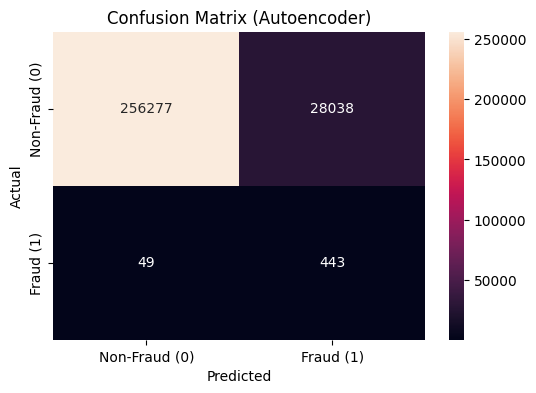

Card Precision@100: 0.2900


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class PMish(nn.Module):
    def __init__(self, init_sigma=0.8):
        super(PMish, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(init_sigma, dtype=torch.float32))
    
    def forward(self, input):
        # Original Mish: x * tanh(softplus(x))
        # Parameterized version: x * tanh(softplus(x / sigma))
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        output = input * tanh_softplus
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            PMish()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            PMish()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9917
Epoch [4/100], Loss: 0.9693
Epoch [6/100], Loss: 0.9485
Epoch [8/100], Loss: 0.9197
Epoch [10/100], Loss: 0.9124
Epoch [12/100], Loss: 0.9064
Epoch [14/100], Loss: 0.8946
Epoch [16/100], Loss: 0.8817
Epoch [18/100], Loss: 0.8702
Epoch [20/100], Loss: 0.8660
Epoch [22/100], Loss: 0.8570
Epoch [24/100], Loss: 0.8530
Epoch [26/100], Loss: 0.8444
Epoch [28/100], Loss: 0.8399
Epoch [30/100], Loss: 0.8336
Epoch [32/100], Loss: 0.8294
Epoch [34/100], Loss: 0.8247
Epoch [36/100], Loss: 0.8176
Epoch [38/100], Loss: 0.8109
Epoch [40/100], Loss: 0.7987
Epoch [42/100], Loss: 0.7921
Epoch [44/100], Loss: 0.7831
Epoch [46/100], Loss: 0.7778
Epoch [48/100], Loss: 0.7703
Epoch [50/100], Loss: 0.7637
Epoch [52/100], Loss: 0.7561
Epoch [54/100], Loss: 0.7499
Epoch [56/100], Loss: 0.7456
Epoch [58/100], Loss: 0.7413
Epoch [60/100], Loss: 0.7432
Epoch [62/100], Loss: 0.7356
Epoch [64/100], Loss: 0.7314
Epoch [66/100], Loss: 0.7265
Epoch [68/100], Loss: 0.7225
Epoch [70/100], Lo

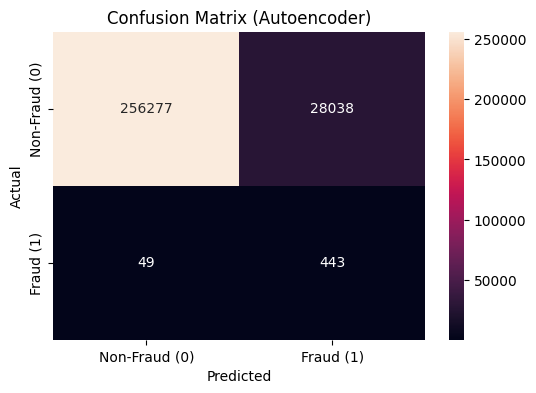

Card Precision@100: 0.3000


In [26]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class PMish(nn.Module):
    def __init__(self, init_sigma=0.8):
        super(PMish, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(init_sigma, dtype=torch.float32))
    
    def forward(self, input):
        # Original Mish: x * tanh(softplus(x))
        # Parameterized version: x * tanh(softplus(x / sigma))
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        output = input * tanh_softplus
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            PMish()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            PMish()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9903
Epoch [4/100], Loss: 0.9574
Epoch [6/100], Loss: 0.9225
Epoch [8/100], Loss: 0.9134
Epoch [10/100], Loss: 0.9093
Epoch [12/100], Loss: 0.8981
Epoch [14/100], Loss: 0.8924
Epoch [16/100], Loss: 0.8801
Epoch [18/100], Loss: 0.8697
Epoch [20/100], Loss: 0.8631
Epoch [22/100], Loss: 0.8533
Epoch [24/100], Loss: 0.8500
Epoch [26/100], Loss: 0.8448
Epoch [28/100], Loss: 0.8394
Epoch [30/100], Loss: 0.8349
Epoch [32/100], Loss: 0.8309
Epoch [34/100], Loss: 0.8279
Epoch [36/100], Loss: 0.8345
Epoch [38/100], Loss: 0.8230
Epoch [40/100], Loss: 0.8189
Epoch [42/100], Loss: 0.8168
Epoch [44/100], Loss: 0.8130
Epoch [46/100], Loss: 0.8101
Epoch [48/100], Loss: 0.8082
Epoch [50/100], Loss: 0.8054
Epoch [52/100], Loss: 0.8019
Epoch [54/100], Loss: 0.7978
Epoch [56/100], Loss: 0.7934
Epoch [58/100], Loss: 0.7870
Epoch [60/100], Loss: 0.7783
Epoch [62/100], Loss: 0.7672
Epoch [64/100], Loss: 0.7573
Epoch [66/100], Loss: 0.7524
Epoch [68/100], Loss: 0.7488
Epoch [70/100], Lo

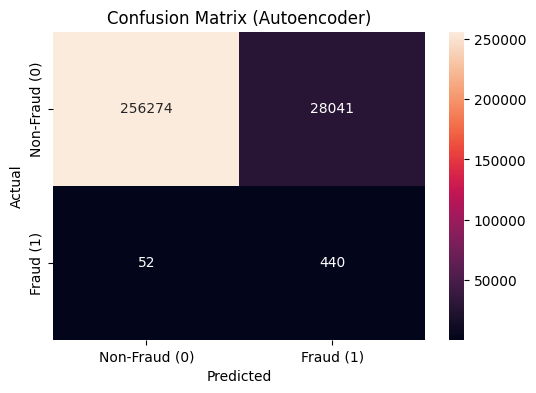

Card Precision@100: 0.2800


In [30]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class PMish(nn.Module):
    def __init__(self, init_sigma=0.8):
        super(PMish, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(init_sigma, dtype=torch.float32))
    
    def forward(self, input):
        # Original Mish: x * tanh(softplus(x))
        # Parameterized version: x * tanh(softplus(x / sigma))
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        output = input * tanh_softplus
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            PMish()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            PMish()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9901
Epoch [4/100], Loss: 0.9618
Epoch [6/100], Loss: 0.9431
Epoch [8/100], Loss: 0.9195
Epoch [10/100], Loss: 0.8959
Epoch [12/100], Loss: 0.8829
Epoch [14/100], Loss: 0.8733
Epoch [16/100], Loss: 0.8659
Epoch [18/100], Loss: 0.8612
Epoch [20/100], Loss: 0.8534
Epoch [22/100], Loss: 0.8513
Epoch [24/100], Loss: 0.8457
Epoch [26/100], Loss: 0.8432
Epoch [28/100], Loss: 0.8372
Epoch [30/100], Loss: 0.8335
Epoch [32/100], Loss: 0.8290
Epoch [34/100], Loss: 0.8342
Epoch [36/100], Loss: 0.8265
Epoch [38/100], Loss: 0.8204
Epoch [40/100], Loss: 0.8196
Epoch [42/100], Loss: 0.8157
Epoch [44/100], Loss: 0.8085
Epoch [46/100], Loss: 0.7992
Epoch [48/100], Loss: 0.7908
Epoch [50/100], Loss: 0.7844
Epoch [52/100], Loss: 0.7840
Epoch [54/100], Loss: 0.7765
Epoch [56/100], Loss: 0.7725
Epoch [58/100], Loss: 0.7691
Epoch [60/100], Loss: 0.7698
Epoch [62/100], Loss: 0.7644
Epoch [64/100], Loss: 0.7599
Epoch [66/100], Loss: 0.7555
Epoch [68/100], Loss: 0.7525
Epoch [70/100], Lo

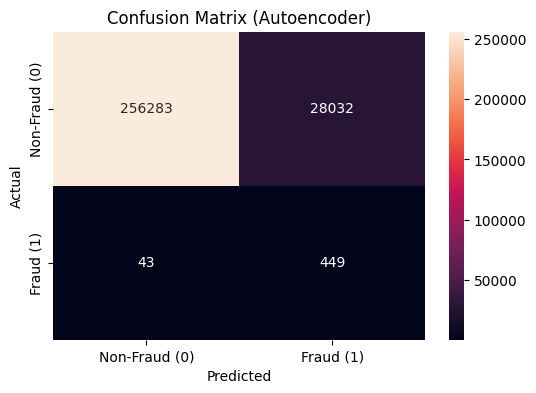

Card Precision@100: 0.3400


In [28]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class PMish(nn.Module):
    def __init__(self, init_sigma=0.8):
        super(PMish, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(init_sigma, dtype=torch.float32))
    
    def forward(self, input):
        # Original Mish: x * tanh(softplus(x))
        # Parameterized version: x * tanh(softplus(x / sigma))
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        output = input * tanh_softplus
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            PMish()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            PMish()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

Class
0    284315
1       492
Name: count, dtype: int64


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Epoch [2/100], Loss: 0.9907
Epoch [4/100], Loss: 0.9762
Epoch [6/100], Loss: 0.9769
Epoch [8/100], Loss: 0.9450
Epoch [10/100], Loss: 0.9362
Epoch [12/100], Loss: 0.9083
Epoch [14/100], Loss: 0.9073
Epoch [16/100], Loss: 0.8906
Epoch [18/100], Loss: 0.8852
Epoch [20/100], Loss: 0.8701
Epoch [22/100], Loss: 0.8535
Epoch [24/100], Loss: 0.8428
Epoch [26/100], Loss: 0.8232
Epoch [28/100], Loss: 0.8164
Epoch [30/100], Loss: 0.7970
Epoch [32/100], Loss: 0.7904
Epoch [34/100], Loss: 0.7842
Epoch [36/100], Loss: 0.7748
Epoch [38/100], Loss: 0.7719
Epoch [40/100], Loss: 0.7632
Epoch [42/100], Loss: 0.7591
Epoch [44/100], Loss: 0.7520
Epoch [46/100], Loss: 0.7488
Epoch [48/100], Loss: 0.7452
Epoch [50/100], Loss: 0.7444
Epoch [52/100], Loss: 0.7397
Epoch [54/100], Loss: 0.7367
Epoch [56/100], Loss: 0.7339
Epoch [58/100], Loss: 0.7309
Epoch [60/100], Loss: 0.7280
Epoch [62/100], Loss: 0.7270
Epoch [64/100], Loss: 0.7289
Epoch [66/100], Loss: 0.7247
Epoch [68/100], Loss: 0.7199
Epoch [70/100], Lo

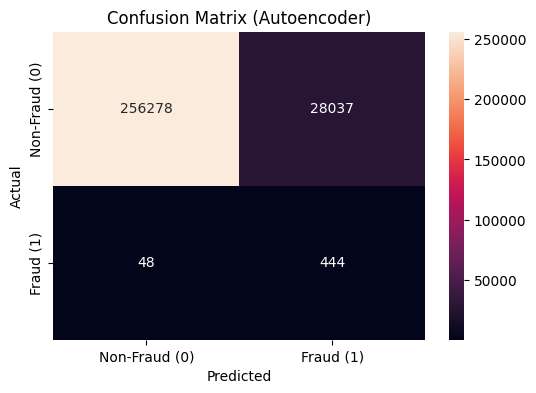

Card Precision@100: 0.3000


In [32]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
##https://www.kaggle.com/code/annastasy/anomaly-detection-credit-card-fraud
# Load the dataset
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")
# Distribution of the target variable (fraud detection)
status_counts = df.Class.value_counts()
print(status_counts)

#特征转化标准化
# Feature names
features = df.columns[:-1]  # Excluding the target column
# Transforming skewed data
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

class GEU(nn.Module):  # 激活函数含噪声参数
    def __init__(self):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(1.0))  # 1个可学习参数 sigma

    def forward(self, input):
        # 计算 GEU 激活函数的输出
        temp = torch.tanh(input / self.sigma)
        return temp

class PMish(nn.Module):
    def __init__(self, init_sigma=0.8):
        super(PMish, self).__init__()
        self.sigma = nn.Parameter(torch.tensor(init_sigma, dtype=torch.float32))
    
    def forward(self, input):
        # Original Mish: x * tanh(softplus(x))
        # Parameterized version: x * tanh(softplus(x / sigma))
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        output = input * tanh_softplus
        return output

class Autoencoder(nn.Module):
    def __init__(self, input_dim):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(),
            nn.Linear(100, 50),
            GEU(),
            nn.Linear(50, 25),
            GEU(),
            nn.Linear(25, 12),
            GEU(),
            nn.Linear(12, 6),
            PMish()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(),
            nn.Linear(12, 25),
            GEU(),
            nn.Linear(25, 50),
            GEU(),
            nn.Linear(50, 100),
            GEU(),
            nn.Linear(100, input_dim),
            PMish()
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize the model
input_dim = df_transformed.shape[1] - 1  # Excluding target column
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)

# Initialize the model, loss function, and optimizer
autoencoder = Autoencoder(input_dim).to(device)
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
df_transformed = df.copy()
# Training the Autoencoder
num_epochs = 100
for epoch in range(num_epochs):
    autoencoder.train()
    optimizer.zero_grad()
    
    # Forward pass
    reconstructed = autoencoder(X_train)
    loss = criterion(reconstructed, X_train)
    
    # Backward pass and optimization
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 2 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Calculate reconstruction error
autoencoder.eval()
X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
reconstructed = autoencoder(X_scaled_tensor)
mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

# Set a threshold for anomaly detection
threshold = np.percentile(mse, 90)
autoen_preds = np.where(mse > threshold, 1, 0)

# Autoencoder evaluation
print("Autoencoder Evaluation:")
print(classification_report(y, autoen_preds))
roc_auc = roc_auc_score(y, autoen_preds)
print("ROC AUC Score: ", roc_auc)



# Confusion Matrix
cm = confusion_matrix(y, autoen_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='g')
plt.title('Confusion Matrix (Autoencoder)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.yticks([0.5, 1.5], ['Non-Fraud (0)', 'Fraud (1)'])
plt.show()

def card_precision_at_k(preds, y_true, k=100):
    """
    Calculate Card Precision at K, i.e., the fraction of relevant items
    (fraud samples) in the top K predictions (highest MSE).
    """
    # Get the indices of the top K largest MSE values
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    
    # Check how many of the top K are actual frauds (y_true == 1)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    
    # Calculate precision: number of frauds in top K / K
    return relevant_count / k

# Use the MSE values (reconstruction errors) from the autoencoder
pred_scores = mse  # The MSE values calculated during autoencoder evaluation

# --- Calculate Card Precision@100 ---
card_precision = card_precision_at_k(pred_scores, y, k=100)
print(f"Card Precision@100: {card_precision:.4f}")

In [1]:
#Bayesian optimization

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * torch.sigmoid(input / self.sigma)
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=100)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8856249845406495
0.29
[[256262  28053]
 [    64    428]]
0.9039493224979908
0.29
[[256280  28035]
 [    46    446]]
0.9049673412733987
0.29
[[256281  28034]
 [    45    447]]
0.9029313037225829
0.34
[[256279  28036]
 [    47    445]]
0.9039493224979908
0.38
[[256280  28035]
 [    46    446]]
0.8937691347439124
0.42
[[256270  28045]
 [    56    436]]
0.8886790408668731
0.48
[[256265  28050]
 [    61    431]]
0.9019132849471752
0.47
[[256278  28037]
 [    48    444]]
Trial 93 finished with value: 1.3719132849471751


In [6]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * torch.sigmoid(input / self.sigma)
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8978412098455437
0.29
[[256274  28041]
 [    52    440]]
0.9029313037225829
0.29
[[256279  28036]
 [    47    445]]
0.8937691347439124
0.31
[[256270  28045]
 [    56    436]]
0.895805172294728
0.31
[[256272  28043]
 [    54    438]]
0.9029313037225829
0.36
[[256279  28036]
 [    47    445]]
0.8978412098455437
0.42
[[256274  28041]
 [    52    440]]
Trial 44 finished with value: 1.3178412098455436


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * torch.sigmoid(input / self.sigma)
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=60)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8907150784176889
0.25
[[256267  28048]
 [    59    433]]
0.9029313037225829
0.27
[[256279  28036]
 [    47    445]]
0.8998772473963595
0.28
[[256276  28039]
 [    50    442]]
0.8856249845406495
0.31
[[256262  28053]
 [    64    428]]
0.896823191070136
0.31
[[256273  28042]
 [    53    439]]
0.8886790408668731
0.32
[[256265  28050]
 [    61    431]]
0.8886790408668731
0.34
[[256265  28050]
 [    61    431]]
0.894810015485801
0.34
[[256284  28031]
 [    55    437]]
0.9008952661717673
0.34
[[256277  28038]
 [    49    443]]
Trial 55 finished with value: 1.2408952661717674


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * torch.sigmoid(input / self.sigma)
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8998772473963595
0.27
[[256276  28039]
 [    50    442]]
0.9008952661717673
0.28
[[256277  28038]
 [    49    443]]
0.8988592286209517
0.29
[[256275  28040]
 [    51    441]]
0.8978412098455437
0.31
[[256274  28041]
 [    52    440]]
0.8998772473963595
0.31
[[256276  28039]
 [    50    442]]
0.9008952661717673
0.44
[[256277  28038]
 [    49    443]]
Trial 24 finished with value: 1.3408952661717672


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * torch.sigmoid(input / self.sigma)
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9039493224979908
0.27
[[256280  28035]
 [    46    446]]
0.9039493224979908
0.28
[[256280  28035]
 [    46    446]]
0.9039493224979908
0.31
[[256280  28035]
 [    46    446]]
0.9008952661717673
0.32
[[256277  28038]
 [    49    443]]
0.8856249845406495
0.35
[[256262  28053]
 [    64    428]]
0.8978412098455437
0.44
[[256274  28041]
 [    52    440]]
Trial 42 finished with value: 1.3378412098455437


In [7]:
SiLU 0.9019132849471752
0.47
[[256278  28037]
 [    48    444]]
Trial 93 finished with value: 1.3719132849471751

0.8978412098455437
0.42
Trial 44 finished with value: 1.3178412098455436

0.8866430033160574
0.38
Trial 11 finished with value: 1.2666430033160574

0.9008952661717673
0.44
Trial 24 finished with value: 1.3408952661717672
    
0.8927511159685045
0.42
Trial 47 finished with value: 1.3127511159685046

0.8978412098455437
0.44
Trial 42 finished with value: 1.3378412098455437

SyntaxError: invalid syntax (4267813759.py, line 1)

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0))/self.sigma)) / 2
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8886790408668731
0.26
[[256265  28050]
 [    61    431]]
0.8907150784176889
0.3
[[256267  28048]
 [    59    433]]
0.9019132849471752
0.31
[[256278  28037]
 [    48    444]]
0.9008952661717673
0.33
[[256277  28038]
 [    49    443]]
0.8988609872337578
0.37
[[256276  28039]
 [    51    441]]
Trial 46 finished with value: 1.268860987233758


In [15]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0))/self.sigma)) / 2
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8947871535193203
0.34
[[256271  28044]
 [    55    437]]
0.9008952661717673
0.34
[[256277  28038]
 [    49    443]]
0.8917330971930967
0.35
[[256268  28047]
 [    58    434]]
0.9019132849471752
0.34
[[256278  28037]
 [    48    444]]
Trial 42 finished with value: 1.2419132849471752


In [21]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0))/self.sigma)) / 2
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=60)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9019132849471752
0.26
[[256278  28037]
 [    48    444]]
0.8988592286209517
0.3
[[256275  28040]
 [    51    441]]
0.8937691347439124
0.31
[[256270  28045]
 [    56    436]]
0.8907150784176889
0.34
[[256267  28048]
 [    59    433]]
0.9029313037225829
0.38
[[256279  28036]
 [    47    445]]
Trial 10 finished with value: 1.282931303722583


In [17]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0))/self.sigma)) / 2
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9049673412733987
0.27
[[256281  28034]
 [    45    447]]
0.9019132849471752
0.28
[[256278  28037]
 [    48    444]]
0.9039493224979908
0.33
[[256280  28035]
 [    46    446]]
0.9059853600488066
0.33
[[256282  28033]
 [    44    448]]
Trial 39 finished with value: 1.2359853600488067


In [18]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0))/self.sigma)) / 2
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9008952661717673
0.25
[[256277  28038]
 [    49    443]]
0.8917330971930967
0.29
[[256268  28047]
 [    58    434]]
0.9019132849471752
0.28
[[256278  28037]
 [    48    444]]
0.9029313037225829
0.29
[[256279  28036]
 [    47    445]]
0.8917330971930967
0.36
[[256268  28047]
 [    58    434]]
0.8896970596422811
0.39
[[256266  28049]
 [    60    432]]
Trial 20 finished with value: 1.279697059642281


In [19]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class GELU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1 + torch.erf(input / torch.sqrt(torch.tensor(2.0))/self.sigma)) / 2
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            GELU(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            GELU(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")


d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9029313037225829
0.28
[[256279  28036]
 [    47    445]]
0.8917330971930967
0.3
[[256268  28047]
 [    58    434]]
0.8927511159685045
0.33
[[256269  28046]
 [    57    435]]
0.9029313037225829
0.37
[[256279  28036]
 [    47    445]]
0.8978412098455437
0.38
[[256274  28041]
 [    52    440]]
0.8988592286209517
0.38
[[256275  28040]
 [    51    441]]
Trial 43 finished with value: 1.2788592286209517


In [22]:
0.8988592286209517
0.38
Trial 43 finished with value: 1.2788592286209517

0.8896970596422811
0.39
Trial 20 finished with value: 1.279697059642281

0.9029313037225829
0.38
Trial 10 finished with value: 1.282931303722583

0.9019132849471752
0.34
Trial 42 finished with value: 1.2419132849471752

0.8988609872337578
0.37
Trial 46 finished with value: 1.268860987233758

SyntaxError: invalid syntax (677001726.py, line 3)

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Mish(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        temp = input * tanh_softplus
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Mish(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Mish(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9008952661717673
0.27
[[256277  28038]
 [    49    443]]
0.8978412098455437
0.29
[[256274  28041]
 [    52    440]]
0.8988592286209517
0.3
[[256275  28040]
 [    51    441]]
0.9039493224979908
0.31
[[256280  28035]
 [    46    446]]
0.9049673412733987
0.34
[[256281  28034]
 [    45    447]]
Trial 27 finished with value: 1.2449673412733988


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Mish(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        temp = input * tanh_softplus
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Mish(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Mish(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8856249845406495
0.27
[[256262  28053]
 [    64    428]]
0.8886790408668731
0.3
[[256265  28050]
 [    61    431]]
0.8998772473963595
0.29
[[256276  28039]
 [    50    442]]
0.8907150784176889
0.32
[[256267  28048]
 [    59    433]]
0.8998772473963595
0.33
[[256276  28039]
 [    50    442]]
0.8998772473963595
0.35
[[256276  28039]
 [    50    442]]
0.8937691347439124
0.41
[[256270  28045]
 [    56    436]]
Trial 29 finished with value: 1.3037691347439124


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Mish(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        temp = input * tanh_softplus
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Mish(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Mish(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9008952661717673
0.28
[[256277  28038]
 [    49    443]]
0.9039493224979908
0.28
[[256280  28035]
 [    46    446]]
0.9008952661717673
0.32
[[256277  28038]
 [    49    443]]
Trial 9 finished with value: 1.2208952661717674


In [4]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Mish(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        temp = input * tanh_softplus
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Mish(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Mish(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8998772473963595
0.27
[[256276  28039]
 [    50    442]]
0.9019132849471752
0.29
[[256278  28037]
 [    48    444]]
0.9029313037225829
0.3
[[256279  28036]
 [    47    445]]
0.8978412098455437
0.31
[[256274  28041]
 [    52    440]]
0.9029313037225829
0.33
[[256279  28036]
 [    47    445]]
0.8988592286209517
0.34
[[256275  28040]
 [    51    441]]
Trial 25 finished with value: 1.2388592286209517


In [5]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Mish(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        softplus = torch.nn.functional.softplus(input / self.sigma)
        tanh_softplus = torch.tanh(softplus)
        temp = input * tanh_softplus
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Mish(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Mish(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9008952661717673
0.27
[[256277  28038]
 [    49    443]]
0.9029313037225829
0.27
[[256279  28036]
 [    47    445]]
0.896823191070136
0.3
[[256273  28042]
 [    53    439]]
0.8988592286209517
0.31
[[256275  28040]
 [    51    441]]
0.8876610220914654
0.35
[[256264  28051]
 [    62    430]]
0.9008952661717673
0.34
[[256277  28038]
 [    49    443]]
Trial 39 finished with value: 1.2408952661717674


In [6]:
0.9008952661717673
0.34
Trial 39 finished with value: 1.2408952661717674
0.8988592286209517
0.34
Trial 25 finished with value: 1.2388592286209517

0.9008952661717673
0.32
Trial 9 finished with value: 1.2208952661717674

0.8937691347439124
0.41
Trial 29 finished with value: 1.3037691347439124
0.9049673412733987
0.34
Trial 27 finished with value: 1.2449673412733988

SyntaxError: invalid syntax (1323484060.py, line 3)

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Gumbel(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1-torch.exp(-torch.exp(input / self.sigma)))
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Gumbel(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Gumbel(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9008952661717673
0.29
[[256277  28038]
 [    49    443]]
0.8978412098455437
0.3
[[256274  28041]
 [    52    440]]
0.8907150784176889
0.36
[[256267  28048]
 [    59    433]]
Trial 9 finished with value: 1.2507150784176888


In [10]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Gumbel(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1-torch.exp(-torch.exp(input / self.sigma)))
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Gumbel(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Gumbel(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8988592286209517
0.28
[[256275  28040]
 [    51    441]]
0.9019132849471752
0.3
[[256278  28037]
 [    48    444]]
0.8886790408668731
0.33
[[256265  28050]
 [    61    431]]
0.9008952661717673
0.34
[[256277  28038]
 [    49    443]]
Trial 25 finished with value: 1.2408952661717674


In [9]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Gumbel(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1-torch.exp(-torch.exp(input / self.sigma)))
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Gumbel(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Gumbel(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9019132849471752
0.26
[[256278  28037]
 [    48    444]]
0.8937691347439124
0.3
[[256270  28045]
 [    56    436]]
0.8927511159685045
0.36
[[256269  28046]
 [    57    435]]
0.9019132849471752
0.36
[[256278  28037]
 [    48    444]]
0.895805172294728
0.38
[[256272  28043]
 [    54    438]]
Trial 31 finished with value: 1.275805172294728


In [11]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Gumbel(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1-torch.exp(-torch.exp(input / self.sigma)))
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Gumbel(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Gumbel(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.8988592286209517
0.28
[[256275  28040]
 [    51    441]]
0.9029313037225829
0.32
[[256279  28036]
 [    47    445]]
0.9029313037225829
0.53
[[256279  28036]
 [    47    445]]
Trial 18 finished with value: 1.432931303722583


In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Load data
df = pd.read_csv("D:/Credit Card Fraud Detection/creditcard.csv")

# Feature transformation and scaling
features = df.columns[:-1]  # Excluding the target column
def log_transform_skewed(column):
    transformed = np.where(column >= 0, np.log1p(column), -np.log1p(-column))
    return transformed

# Log transform skewed features
df_transformed = df.copy()
for col in features:
    if abs(df[col].skew()) > 0.75:  # Threshold for skewness
        df_transformed[col] = log_transform_skewed(df[col])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_transformed[features])
y = df_transformed.Class.values

# Define GEU activation function with learnable sigma
class GEU(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = torch.tanh(input / self.sigma)
        return temp

# Define GELU activation function with learnable sigma
class Gumbel(nn.Module):
    def __init__(self, sigma_init=1.0):
        super().__init__()
        self.sigma = nn.Parameter(torch.tensor(sigma_init))  # Learnable parameter sigma

    def forward(self, input):
        temp = input * (1-torch.exp(-torch.exp(input / self.sigma)))
        return temp

# Define the Autoencoder model with GEU and GELU layers
class Autoencoder(nn.Module):
    def __init__(self, input_dim, geu_sigma_list, gelu_sigma_list):
        super(Autoencoder, self).__init__()

        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, 100),
            GEU(sigma_init=geu_sigma_list[0]),  # First GEU layer with specific sigma
            nn.Linear(100, 50),
            GEU(sigma_init=geu_sigma_list[1]),  # Second GEU layer with specific sigma
            nn.Linear(50, 25),
            GEU(sigma_init=geu_sigma_list[2]),  # Third GEU layer with specific sigma
            nn.Linear(25, 12),
            GEU(sigma_init=geu_sigma_list[3]),  # Fourth GEU layer with specific sigma
            nn.Linear(12, 6),
            Gumbel(sigma_init=gelu_sigma_list[0])  # First GELU layer with specific sigma
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(6, 12),
            GEU(sigma_init=geu_sigma_list[4]),  # Fifth GEU layer with specific sigma
            nn.Linear(12, 25),
            GEU(sigma_init=geu_sigma_list[5]),  # Sixth GEU layer with specific sigma
            nn.Linear(25, 50),
            GEU(sigma_init=geu_sigma_list[6]),  # Seventh GEU layer with specific sigma
            nn.Linear(50, 100),
            GEU(sigma_init=geu_sigma_list[7]),  # Eighth GEU layer with specific sigma
            nn.Linear(100, input_dim),
            Gumbel(sigma_init=gelu_sigma_list[1])  # Second GELU layer with specific sigma
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

# Device setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training data (fraud = 0, non-fraud = 1)
X_train = torch.tensor(X_scaled[y == 0], dtype=torch.float32).to(device)
y_train = torch.tensor(y[y == 0], dtype=torch.float32).to(device)

# Define function to compute Card Precision at K
def card_precision_at_k(preds, y_true, k=100):
    top_k_indices = np.argsort(preds)[-k:]  # Indices of the top K MSE values (highest reconstruction errors)
    relevant_count = np.sum(y_true[top_k_indices] == 1)  # Count how many of the top K are frauds
    return relevant_count / k

# Define the Optuna objective function
bestobjective_value = -10
def objective(trial):
    global bestobjective_value
    # Suggest sigma values for each layer
    geu_sigma_list = [
        trial.suggest_float('geu_sigma_1', 0.001, 3.0),
        trial.suggest_float('geu_sigma_2', 0.001, 3.0),
        trial.suggest_float('geu_sigma_3', 0.001, 3.0),
        trial.suggest_float('geu_sigma_4', 0.001, 3.0),
        trial.suggest_float('geu_sigma_5', 0.001, 3.0),
        trial.suggest_float('geu_sigma_6', 0.001, 3.0),
        trial.suggest_float('geu_sigma_7', 0.001, 3.0),
        trial.suggest_float('geu_sigma_8', 0.001, 3.0)
    ]
    
    gelu_sigma_list = [
        trial.suggest_float('gelu_sigma_1', 0.001, 3.0),
        trial.suggest_float('gelu_sigma_2', 0.001, 3.0)
    ]

    # Initialize the Autoencoder with the optimized sigma values for each layer
    autoencoder = Autoencoder(input_dim=X_train.shape[1], geu_sigma_list=geu_sigma_list, gelu_sigma_list=gelu_sigma_list).to(device)

    # Initialize optimizer and loss function
    optimizer = optim.Adam(autoencoder.parameters(), lr=0.01)
    criterion = nn.MSELoss()

    # Training the Autoencoder
    num_epochs = 100  # Set training epochs to 100 for stability
    for epoch in range(num_epochs):
        autoencoder.train()
        optimizer.zero_grad()
        
        # Forward pass
        reconstructed = autoencoder(X_train)
        loss = criterion(reconstructed, X_train)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()

    # Calculate reconstruction error (MSE)
    autoencoder.eval()
    X_scaled_tensor = torch.tensor(X_scaled, dtype=torch.float32).to(device)
    reconstructed = autoencoder(X_scaled_tensor)
    mse = torch.mean((X_scaled_tensor - reconstructed) ** 2, dim=1).cpu().detach().numpy()

    # Set a threshold for anomaly detection
    threshold = np.percentile(mse, 90)
    autoen_preds = np.where(mse > threshold, 1, 0)

    # Autoencoder evaluation (ROC AUC and Card Precision@100)
    auc_score = roc_auc_score(y, autoen_preds)
    
    # Card Precision at 100
    card_precision = card_precision_at_k(mse, y, k=100)

    # Combine metric as the objective (AUC + Card Precision)
    objective_value = auc_score + card_precision  # Adjust weighting if necessary

    if objective_value > bestobjective_value:
        print(auc_score)
        print(card_precision)
        cm = confusion_matrix(y, autoen_preds)
        print(cm)
        bestobjective_value = objective_value
    else:
        pass

   
    return objective_value

# Create an Optuna study
study = optuna.create_study(direction='maximize')  # Maximize the objective value
study.optimize(objective, n_trials=50)

# Print the best parameters after optimization
print(f"Trial {study.best_trial.number} finished with value: {study.best_trial.value}")

d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
d:\anaconda\envs\torch2\lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.9008952661717673
0.27
[[256277  28038]
 [    49    443]]
0.8917330971930967
0.34
[[256268  28047]
 [    58    434]]
0.8988592286209517
0.41
[[256275  28040]
 [    51    441]]
Trial 3 finished with value: 1.3088592286209517


In [15]:
0.8907150784176889
0.36
Trial 9 finished with value: 1.2507150784176888

0.9008952661717673
0.34
Trial 25 finished with value: 1.2408952661717674
0.895805172294728
0.38
Trial 31 finished with value: 1.275805172294728
0.9029313037225829
0.53
[[256279  28036]
 [    47    445]]
Trial 18 finished with value: 1.432931303722583

0.8988592286209517
0.41
Trial 3 finished with value: 1.3088592286209517

SyntaxError: invalid syntax (264745008.py, line 3)